(optim)=
# Optimization

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

## Gradient descent in one variable

Consider the optimization problem of locating the minimum values of the polynomial function

$$
J(\theta) = \theta^4 - 6\theta^3 + 11\theta^2 - 7\theta + 4.
$$

This function is called the _objective function_ of the optimization problem. Its graph is displayed in:

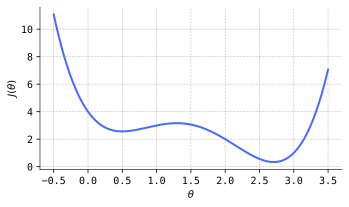

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from itertools import product
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings("ignore")
blue = '#486AFB'
magenta = '#FD46FC'

def J(theta):
    return (theta ** 4) - 6 * (theta ** 3) + 11 * (theta ** 2) - 7 * theta + 4

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

From the graph, we see that the objective function is minimized near $\theta^\star\approx 0.5$ and $2.7$; these values are called _(local) minimizers_ of the objective function.

We shall use a simple single-variable version of the _gradient descent (GD) algorithm_ to solve this optimization problem. In this context, the GD algorithm is called the _optimizer_. This algorithm depends on an initial guess for a minimizer, as well as two parameters called the _learning rate_ and the _number of gradient steps_. We will state the algorithm first, and then walk through some intuition for why it works:

```{prf:algorithm} Single-variable gradient descent

**Input:** A differentiable objective function $J:\mathbb{R}\to \mathbb{R}$, an initial guess $\theta_0\in \mathbb{R}$ for a minimizer $\theta^\star$, a learning rate $\alpha>0$, and the number $N$ of gradient steps.

**Output:** An approximation to a minimizer $\theta^\star$.

1. $\theta := \theta_0$
2. For $t$ from $1$ to $N$, do:
    1. $\theta := \theta - \alpha J'(\theta)$
3. Return $\theta$.
```

Beginning from an initial guess $\theta_0$ for a minimizer, the GD algorithm outputs a sequence of approximations $\theta_1,\theta_2,\ldots,\theta_N$ for a minimizer. The last value $\theta_N$ in the sequence is taken as the output of the algorithm; if the algorithm converges to a minimizer, then we should have $\theta_N \approx \theta^\star$.

The equation

```{math}
:label: update-rule-eqn

\theta_t := \theta_{t-1} - \alpha J'(\theta_{t-1})
```

in the `for` loop is called the _update rule_; we say that the new parameter $\theta_t$ is obtained by taking a _gradient step_ from $\theta_{t-1}$. The first update occurs when $t=1$, yielding

$$
\theta_1 := \theta_{0} - \alpha J'(\theta_{0}).
$$

To understand the intuition for this rule, consider the two cases that the derivative $J'(\theta_0)$ is positive or negative:

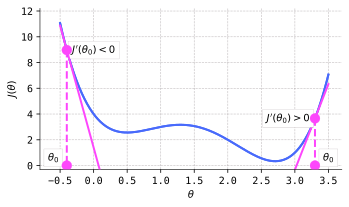

In [2]:
def J_prime(theta):
    return 4 * (theta ** 3) - 18 * (theta ** 2) + 22 * theta - 7

plt.plot(grid, J(grid), color=blue)
plt.plot(grid, J_prime(-0.4) * (grid + 0.4) + J(-0.4), color=magenta, zorder=10)
plt.scatter(-0.4, J(-0.4), color=magenta, s=100, zorder=15)
plt.scatter(-0.4, 0, color=magenta, s=100, zorder=20)
plt.plot([-0.4, -0.4], [J(-0.4), 0], color=magenta, linestyle='--')
plt.xlim(-0.8, 3.7)
plt.ylim(-0.3, 12.2)
plt.text(-0.6, 0.6, r'$\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(0, J(-0.4), r"$J'(\theta_0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.plot(grid, J(grid))
plt.plot(grid, J_prime(3.3) * (grid - 3.3) + J(3.3))
plt.scatter(3.3, J(3.3), color=magenta, s=100, zorder=10)
plt.scatter(3.3, 0, color=magenta, s=100, zorder=10)
plt.plot([3.3, 3.3], [J(3.3), 0], color=magenta, linestyle='--')
plt.text(3.5, 0.6, r'$\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(2.9, J(3.3), r"$J'(\theta_0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

In this plot, we've drawn the tangent lines to the graph of $J(\theta)$ at two initial values $\theta_0=-0.4$ and $\theta_0=3.3$. Since the derivatives are the slopes of these tangent lines, the sign of the derivative is negative when $\theta_0=-0.4$ and positive when $\theta_0 = 3.3$. In the first case, we have

```{math}
:label: first-update-eqn

\theta_1 = -0.4 - \alpha J'(-0.4) > -0.4
```

since $\alpha>0$, while in the second case we have

```{math}
:label: second-update-eqn

\theta_1 = 3.3 - \alpha J'(3.3) < 3.3.
```

But notice that the nearest minimizer to $\theta_0 = -0.4$ is $\theta^\star \approx 0.5$, and so the new $\theta_1$ computed according to {eq}`first-update-eqn` should be closer to $\theta^\star$ than the initial guess $\theta_0$, provided that the (scaled) negative derivative

```{math}
:label: neg-derivative-eqn
-\alpha J'(\theta_0)
```

is not too large (in magnitude) causing the new $\theta_1$ to "overshoot" the minimizer $\theta^\star$. Similarly, the nearest minimizer to $\theta_0 = 3.3$ is $\theta^\star \approx 2.7$, so the new $\theta_1$ computed according to {eq}`second-update-eqn` should be closer to $\theta^\star$ than $\theta_0$, again provided that the (scaled) negative derivative {eq}`neg-derivative-eqn` is not too large in magnitude.

From these considerations, we conclude the following:

```{prf:observation}
:label: gd-obs

* The negative derivative $-J(\theta)$ always "points downhill."
* When the gradient descent algorithm works, it locates a minimizer by following the negative derivative "downhill."
```

The sense in which the negative derivative "points downhill" is made precise by our observation that it is positive if the point $(\theta_0,J(\theta_0))$ sits on a decreasing portion of the graph of $J(\theta)$, and it is negative if $(\theta_0,J(\theta_0))$ is on an increasing portion of the graph. The role of the learning rate $\alpha$ is to scale down the magnitude of the negative derivative so that the gradient step in the update rule does not cause $\theta_1$ to "overshoot" a nearby minimizer.

Let's run the GD algorithm four times, with various settings of the parameters:

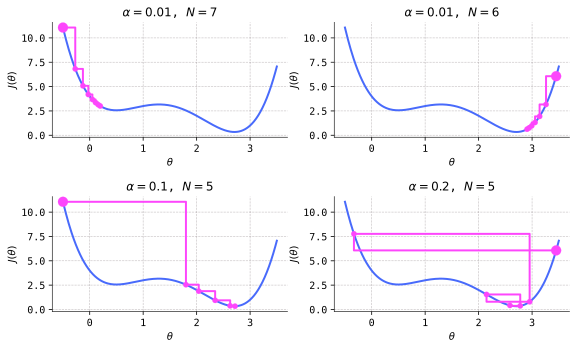

In [3]:
# define the gradient descent function
def GD(theta, J, num_steps, lr, decay=0):
    
    # initialize lists to track objective values and thetas
    running_objectives = []
    running_thetas = []

    # begin gradient descent loop
    for t in range(num_steps):

        # compute objective with current theta
        objective = J(theta)
        
        # compute gradients
        objective.backward()
        
        # append current objective and theta to running lists
        running_objectives.append(objective.detach().view(1))
        running_thetas.append(theta.detach().clone())
        
        # take a step and update the theta
        with torch.no_grad():
            g = ((1 - decay) ** (t + 1)) * theta.grad
            theta -= lr * g

        # zero out the gradient to prepare for the next iteration
        theta.grad.zero_()

    # output tensors instead of lists
    running_thetas = torch.row_stack(running_thetas)
    running_objectives = torch.row_stack(running_objectives)

    return running_thetas, running_objectives

# plot objective function
grid = torch.linspace(start=-0.5, end=3.5, steps=300)
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
for i in range(4):
    idx = axes_idx[i]
    axes[idx].plot(grid, J(grid))

# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([-0.5], requires_grad=True), torch.tensor([3.45], requires_grad=True), torch.tensor([-0.5], requires_grad=True), torch.tensor([3.45], requires_grad=True)],
                 'num_steps': [8, 7, 6, 6],
                 'lr': [1e-2, 1e-2, 1e-1, 2e-1]}

# run gradient descent and plot
for i in range(4):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = GD(**gd_parameters_slice, J=J)
    idx = axes_idx[i]
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps'] - 1
    axes[idx].step(x=running_parameters, y=running_objectives, where='post', color=magenta, zorder=2)
    axes[idx].scatter(x=running_parameters, y=running_objectives, s=30, color=magenta, zorder=2)
    axes[idx].scatter(x=running_parameters[0], y=running_objectives[0], s=100, color=magenta, zorder=2)
    axes[idx].set_xlabel(r'$\theta$')
    axes[idx].set_ylabel(r'$J(\theta)$')
    axes[idx].set_title(fr'$\alpha={lr}$, $N={num_steps}$')
plt.tight_layout()

In all four plots, the large magenta dot represents the initial point $(\theta_0,J(\theta_0))$, while the smaller dots represent the points

$$
(\theta_1,J(\theta_1)), (\theta_2, J(\theta_2)),\ldots, (\theta_N,J(\theta_N)),
$$

where $N$ is the number of gradient steps in the `for` loop in the GD algorithm. In the first row, the algorithm appears to be converging in both cases to the nearest minimizer to the initial guesses. In the second row, the learning rate is (relatively) large, causing the first gradient steps to "overshoot" the nearest minimizers to the initial guesses. However, the algorithm still appears to converge in both cases.

It is possible for the GD algorithm to diverge, especially if the learning rate is too large. For example, suppose that we set the learning rate to $\alpha = 0.2$ and use $\theta_0 = 3.5$ as our initial guess. Then three steps of gradient descent produce the following:

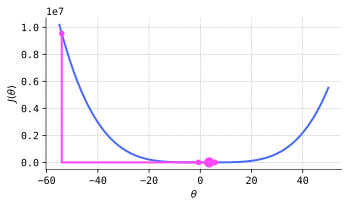

In [4]:
gd_parameters = {'theta': torch.tensor([3.5], requires_grad=True),
                 'num_steps': 4,
                 'lr': 2e-1,}

running_parameters, running_objectives = GD(**gd_parameters, J=J)

grid = torch.linspace(start=-55, end=50, steps=300)
plt.plot(grid, J(grid))
plt.step(x=running_parameters, y=running_objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=running_parameters, y=running_objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=running_parameters[0], y=running_objectives[0], s=100, color=magenta, zorder=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

We see already that $J(\theta_3) \approx 10^7$; in fact, we have $J(\theta_t) \to \infty$ as $t\to\infty$ for these particular parameters. Of course, one can often prevent divergence by simply using a smaller learning rate, but sometimes a large _initial_ learning rate is desirable to help the algorithm quickly find the neighborhood of a minimizer. So, what we desire is a scheme to shrink the learning rate from (relatively) large values to (relatively) smaller ones as the algorithm runs. This scheme is called _learning rate decay_ or _rate decay_.

```{prf:algorithm} Single-variable gradient descent with rate decay

**Input:** A differentiable objective function $J:\mathbb{R}\to \mathbb{R}$, an initial guess $\theta_0\in \mathbb{R}$ for a minimizer $\theta^\star$, a learning rate $\alpha>0$, a decay rate $\gamma \in [0, 1)$, and the number $N$ of gradient steps.

**Output:** An approximation to a minimizer $\theta^\star$.

* $\theta := \theta_0$
* For $t$ from $1$ to $N$, do:
    * $\theta := \theta - \alpha (1 - \gamma)^t J'(\theta)$
* Return $\theta$.
```

While there are many ways to shrink the learning rate during gradient descent, the simple version in this implementation multiplies the derivative $J'(\theta_{t-1})$ by a factor $(1-\gamma)^t \in (0,1]$. Setting $\gamma=0$ results in _no_ rate decay. In our diverging example above, setting $\gamma=0.2$ results in:

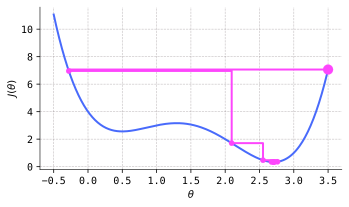

In [5]:
gd_parameters = {'theta': torch.tensor([3.5], requires_grad=True),
                 'num_steps': 9,
                 'lr': 2e-1,}

running_parameters, running_objectives = GD(**gd_parameters, J=J, decay=0.1)

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.step(x=running_parameters, y=running_objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=running_parameters, y=running_objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=running_parameters[0], y=running_objectives[0], s=100, color=magenta, zorder=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$J(\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

We have carried out $N=8$ gradient steps, and it appears that the algorithm has successfully located the minimizer $\theta^\star \approx 2.7$.

The learning rate $\alpha$ and the decay rate $\gamma$ are often chosen by experimentation.

```{admonition} Tip

When using the gradient descent algorithm to solve an optimization problem, try beginning with a learning and decay rate around $\alpha \approx 0.01$ and $\gamma \approx 0.1$, respectively.
```

These values may be tuned by the analyst by closely monitoring the values of the objective function $J(\theta)$ as the algorithm runs. This is easy in the single-variable case, since one can plot the graph of $J(\theta)$. In the multi-variable case, however, the graph of $J(\theta)$ may live in many more dimensions than we can visualize, so the analyst might track the values of the objective function against the number of gradient steps. For example, with our polynomial objective function $J(\theta)$ from above and

$$
\theta_0 = -0.5, \quad \alpha = 0.01, \quad \gamma = 0.1,
$$

we would plot the following:

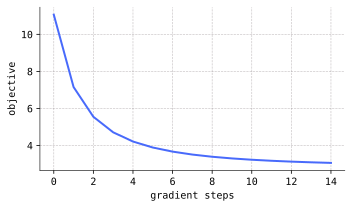

In [6]:
gd_parameters = {'theta': torch.tensor([-0.5], requires_grad=True),
                 'num_steps': 15,
                 'lr': 1e-2,}

running_parameters, running_objectives = GD(**gd_parameters, J=J, decay=0.1)

plt.plot(range(len(running_objectives)), running_objectives)
plt.xlabel('gradient steps')
plt.ylabel('objective')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

One may use this plot to decide on the total number $N$ of gradient steps; simply choose $N$ large enough to reach a point where the plot "plateaus" or "levels out," indicating that the algorithm is converging on a minimizer. Alternatively, the analyst may build an automatic stopping condition into the algorithm that halts when the magnitude between successive objective values is less than some chosen threshold, say

$$
|J(\theta_t) - J(\theta_{t-1}) | < \epsilon,
$$

where $\epsilon>0$ is a small number.











## Gradient descent in multiple variables

We began this chapter with a discussion of the single-variable gradient descent algorithm only to help build intuition. But in reality the objective functions encountered in practice are functions of multiple variables---often many, _many_ variables! So, in this section, we adapt the single-variable gradient descent algorithm to apply to functions of the form

$$
J:\mathbb{R}^n \to \mathbb{R},
$$

where $n$ is a positive integer. We will write a bold face $\btheta \in \mathbb{R}^n$ to stand for the (column!) vector of input variables to the objective function.

The goal here, as it was in the single-variable case, is to find (local) minimizers $\btheta^\star$ of $J(\btheta)$. By definition, a vector $\btheta^\star$ is a local minimizer if

$$
J(\btheta^\star) \leq J(\btheta)
$$

for all $\btheta$ in an open neighborhood of $\btheta^\star$. The underlying intuition for the multi-variable gradient descent algorithm is the natural generalization of the intuition from the single-variable case in {prf:ref}`gd-obs`. Indeed, provided that the objective function $J$ is differentiable, we have:

```{prf:observation}

* The negative gradient $-\nabla J(\btheta)$ always "points downhill."
* When the gradient descent algorithm works, it locates a minimizer by following the negative gradient "downhill."
```

The claim in the first bullet point may be made precise by recalling the relationship between the gradient and directional derivatives that you learned in multi-variable calculus: Given a unit vector $\mathbf{u}\in \mathbb{R}^n$, we have

```{math}
:label: grad-directional-eqn

\nabla J(\btheta) \mathbf{u} = \lim_{h\to \infty} \frac{J(\btheta + h\mathbf{u}) - J(\btheta)}{h},
```

where the right-hand side is the directional derivative of $J$ in the direction of $\mathbf{u}$. The matrix product on the left-hand side (gradients are row vectors!) is equal to the product

```{math}
:label: grad-dot-eqn

|\nabla J(\theta) |\cos{\phi},
```

where $\phi\in [0,\pi]$ is the angle between the gradient $\nabla J(\theta)$ and $\mathbf{u}$. This shows the directional derivative is minimized when $\phi = \pi$, and so the direction of fastest descent points in the direction of the negative gradient $-\nabla J(\theta)$.

Another important consequence of the equations {eq}`grad-directional-eqn` and {eq}`grad-dot-eqn` is that the gradient vector (and its negative) are normal to the level (hyper-)surfaces of $J(\btheta)$ (which are also called contours). Indeed, if $\mathbf{u}$ is a unit tangent vector to a level surface of $J(\btheta)$, then the directional derivative of $J$ in the direction of $\mathbf{u}$ must be $0$ since $J$ is (by definition) constant along its level surfaces. But then we must have $\phi = \pi/2$.

After these preparations, we state the algorithm:

```{prf:algorithm} Multi-variable gradient descent with rate decay

**Input:** A differentiable objective function $J:\mathbb{R}^n\to \mathbb{R}$, an initial guess $\btheta_0\in \mathbb{R}^n$ for a minimizer $\btheta^\star$, a learning rate $\alpha>0$, a decay rate $\gamma \in [0, 1)$, and the number $N$ of gradient steps.

**Output:** An approximation to a minimizer $\btheta^\star$.

* $\btheta := \btheta_0$
* For $t$ from $1$ to $N$, do:
    * $\btheta := \btheta - \alpha(1-\gamma)^t \nabla J(\btheta)^T$
* Return $\btheta$.
```

Remember, we are viewing the input vector $\btheta$ as column vector and the gradient $\nabla J(\btheta)$ as a row vector; this accounts for the transpose in the update rule. Notice that this algorithm specializes to its single-variable cousin in the case $n=1$ since $J'(\theta) = \nabla J(\theta)$ when $\theta \in \mathbb{R}$.

For an example, let's consider the polynomial objective function

$$
J(\btheta) = J(\theta_1,\theta_2) = (\theta_1^2 + 10 \theta_2^2)\big((\theta_1-1)^2 + 10(\theta_2-1)^2 \big)
$$

in two dimensions. This function has two minimizers

$$
\btheta^\star = (0, 0), (1,1),
$$

as well as a "saddle point" at $(0.5, 0.5)$ where the gradient $\nabla J(\btheta)$ vanishes. A contour plot of its level curves looks like:

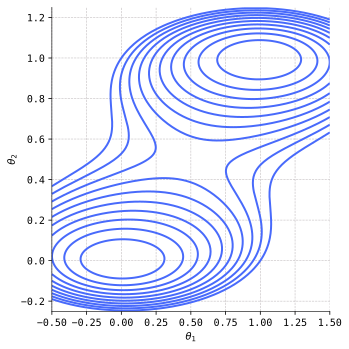

In [7]:
# define the objective function
def J(theta):
    theta_1, theta_2 = (theta[:, 0], theta[:, 1]) if theta.ndim == 2 else theta
    return (theta_1 ** 2 + 10 * theta_2 ** 2) * ((theta_1 - 1) ** 2 + 10 * (theta_2 - 1) ** 2)

# plot contours of objective function
linspace_x = torch.linspace(start=-0.5, end=1.5, steps=200)
linspace_y = torch.linspace(start=-0.25, end=1.25, steps=200)
x, y = torch.meshgrid(linspace_x, linspace_y)
grid = torch.column_stack(tensors=(x.reshape(-1, 1), y.reshape(-1, 1)))
z = J(grid).reshape(x.shape)

plt.contour(x, y, z, levels=range(11), colors=blue)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.gcf().set_size_inches(w=5, h=5)
plt.tight_layout()

Let's run the GD algorithm four times beginning with _no_ rate decay, and track the approximations $\btheta_t$ in $\mathbb{R}^2$ plotted over the contours of $J(\btheta)$:

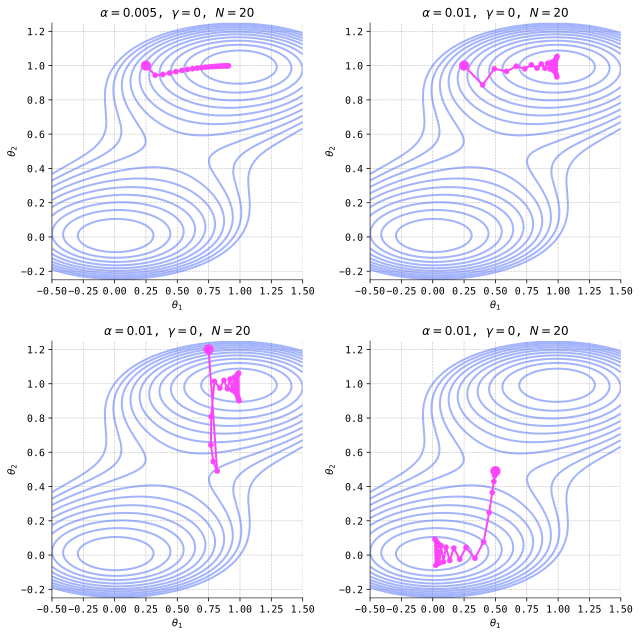

In [8]:
# plot the objective function
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
for k in range(4):
    idx = axes_idx[k]
    axes[idx].contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)

# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.75, 1.2], requires_grad=True), torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [21, 21, 21, 21],
                 'lr': [5e-3, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
for i in range(4):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = GD(**gd_parameters_slice, J=J)
    idx = axes_idx[i]
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps'] - 1
    axes[idx].plot(running_parameters[:, 0], running_parameters[:, 1], color=magenta)
    axes[idx].scatter(running_parameters[:, 0], running_parameters[:, 1], s=30, color=magenta, zorder=2)
    axes[idx].scatter(x=running_parameters[0, 0], y=running_parameters[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')
    axes[idx].set_title(fr'$\alpha={lr}$, $\gamma=0$, $N={num_steps}$')
plt.tight_layout()

The large magenta dots in the plots indicate the initial guesses $\btheta_0$, while the smaller dots indicate the approximations $\btheta_t$ for $t>0$. The algorithm appears to be converging nicely to the minimizer $\btheta^\star = (1,1)$ in the upper-left plot; notice that the learning rate $\alpha = 0.005$ is quite small. In the other three plots, the algorithm finds a neighborhood of a minimizer, but then oscillates back and forth and never appears to settle on the minimizer; this is due to the larger learning rate at $\alpha=0.01$.

We may dampen these oscillations and encourage the algorithm to converge by adding learning rate decay. Here are four plots with the same initial values and learning rates, but with $\gamma = 0.05$ and $N$ increased to $40$ to account for the learning rate decay:

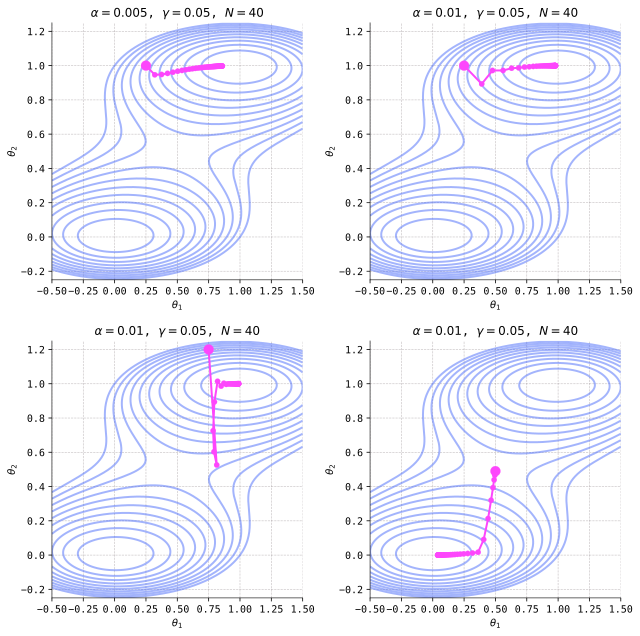

In [9]:
# plot the objective function
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))
for k in range(4):
    idx = axes_idx[k]
    axes[idx].contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)

# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.75, 1.2], requires_grad=True), torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [41, 41, 41, 41],
                 'lr': [5e-3, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
for i in range(4):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = GD(**gd_parameters_slice, J=J, decay=0.05)
    idx = axes_idx[i]
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps'] - 1
    axes[idx].plot(running_parameters[:, 0], running_parameters[:, 1], color=magenta)
    axes[idx].scatter(running_parameters[:, 0], running_parameters[:, 1], s=30, color=magenta, zorder=2)
    axes[idx].scatter(x=running_parameters[0, 0], y=running_parameters[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')
    axes[idx].set_title(fr'$\alpha={lr}$, $\gamma=0.05$, $N={num_steps}$')
plt.tight_layout()

Now, the learning rate $\alpha = 0.005$ in the first plot appears to be much too small causing the gradient steps to shrink too fast before the algorithm converges. On the other hand, the algorithm in the other three plots appears to be nicely converging to minimizers. We have effectively "dampened out" the wild oscillations in the first four plots above.

Here are the values of the objective function in all four runs, plotted against the number of gradient steps:

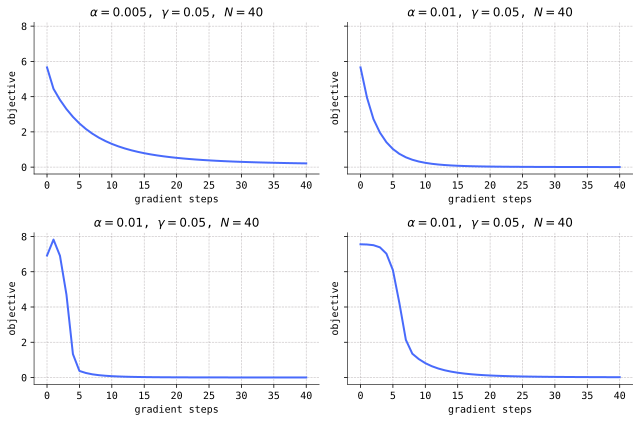

In [10]:
# parameters for gradient descent
gd_parameters = {'theta': [torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.25, 1], requires_grad=True), torch.tensor([0.75, 1.2], requires_grad=True), torch.tensor([0.5, 0.49], requires_grad=True)],
                 'num_steps': [41, 41, 41, 41],
                 'lr': [5e-3, 1e-2, 1e-2, 1e-2]}

# run gradient descent and plot
axes_idx = list(product(range(2), repeat=2))
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i in range(4):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    _, running_objectives = GD(**gd_parameters_slice, J=J, decay=0.05)
    idx = axes_idx[i]
    lr = gd_parameters_slice['lr']
    num_steps = gd_parameters_slice['num_steps'] - 1
    axes[idx].plot(range(len(running_objectives)), running_objectives)
    axes[idx].set_xlabel('gradient steps')
    axes[idx].set_ylabel('objective')
    axes[idx].set_title(fr'$\alpha={lr}$, $\gamma=0.05$, $N={num_steps}$')
plt.tight_layout()

Notice the initial "overshoot" in the plot in the bottom left, causing the objective function $J(\btheta)$ to _increase_ after the first gradient step. Recall also that the initial value $\btheta_0$ in the bottom right plot is near the saddle point $(0.5,0.5)$, causing $\nabla J(\btheta_0) \approx 0$. This accounts for the small initial changes in the objective function $J(\btheta)$ indicated by the (nearly) horizontal stretch early in the run of the algorithm.

Of course, an objective function $J:\mathbb{R}^2 \to \mathbb{R}$ defined on a $2$-dimensional input space is still not a realistic example of the objective functions encountered in the real world. In two dimensions, we have the ability to plot the algorithm's progress through $\mathbb{R}^2$ on a contour plot, as we did above. In dimensions $n\geq 4$ we lose this visual aid, though one may plot input variables two at a time in $\mathbb{R}^2$. But no matter the input dimension, we may always plot the objective values against the number of gradient steps as a diagnostic plot for convergence.












## Stochastic gradient descent

The special types of objective functions that we will see in {numref}`Chapter %s <learning>` are so-called _stochastic objective functions_ of the form

```{math}
:label: stoch-obj-eqn

J(\btheta) = E\big( g(\mathbf{X};\btheta) \big)
```

where $\mathbf{X}$ is an $n$-dimensional random vector, $\btheta \in \mathbb{R}^k$ is a $k$-dimensional _parameter vector_, and $g:\mathbb{R}^{n+k} \to \mathbb{R}$ is a function. In many important cases, the probability distribution of $\mathbf{X}$ is discrete and does not depend on $\btheta$, so that

```{math}
:label: object-expect-eqn

J(\btheta) = \sum_{\mathbf{x}\in \mathbb{R}^n} g(\mathbf{x};\btheta)p(\mathbf{x})
```


where $p(\mathbf{x})$ is the mass function of $\mathbf{X}$. In fact, the mass function $p(\mathbf{x})$ will often be an _empirical_ mass function of an observed multivariate dataset

$$
\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}\in \mathbb{R}^n,
$$

where we use a superscript with parentheses to index the data vectors rather than a subscript. Then, from {eq}`object-expect-eqn` and the definition of the mass function, we get

$$
J(\btheta) = \frac{1}{m} \sum_{i=1}^m g\big(\mathbf{x}^{(i)}; \btheta \big).
$$

Provided that the function is differentiable with respect to the parameter vector $\btheta$, we have

```{math}
:label: batch-eqn
\nabla_\btheta J(\btheta) = \frac{1}{m} \sum_{i=1}^m \nabla_\btheta g\big(\mathbf{x}^{(i)}; \btheta \big)
```

where we write $\nabla_\btheta$ to emphasize that the gradient is computed with respect to the parameter vector $\btheta$. In this context, the gradient descent algorithm applied to {eq}`batch-eqn` is given a new name:

```{prf:definition}

The _batch gradient descent algorithm_ is the gradient descent algorithm applied to a stochastic objective function of the form {eq}`batch-eqn`.
```

Let's take a look at a simple example. Suppose that we define

```{math}
:label: quadratic-eqn

g: \bbr^4 \to \bbr, \quad g(\bx,\btheta) = |\bx - \btheta|^2,
```

where $\bx,\btheta\in \bbr^2$ and the vertical bars represent the usual Euclidean norm. We create a bivariate dataset by drawing a random sample of size $1{,}024$ drawn from a $\mathcal{N}_2(\boldsymbol0,I)$ distribution. A scatter plot of the dataset looks like this:

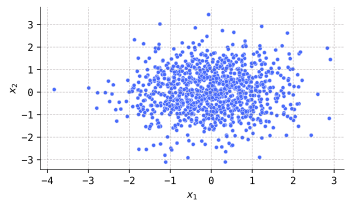

In [11]:
torch.manual_seed(42)
dataset = MultivariateNormal(loc=torch.zeros(2), covariance_matrix=torch.eye(2)).sample(sample_shape=(1024,))

sns.scatterplot(x=dataset[:, 0], y=dataset[:, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

Then, two runs of the batch gradient descent algorithm produce the following plots of the objective function versus gradient steps:

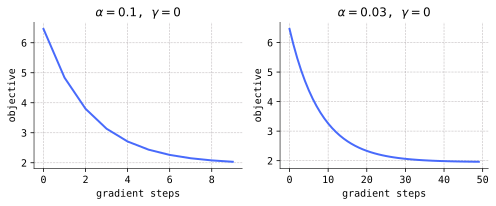

In [12]:
def SGD(parameters, dataset, J, num_epochs, batch_size, lr, tracking, decay=0, max_steps=-1, shuffle=True, random_state=None):

    # define data loader
    if random_state is not None:
        torch.manual_seed(random_state)
    data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle)
    
    # initialize lists and a dictionary to track objectives and parameters
    running_objectives = []
    running_parameters = {name: [] for name in parameters.keys()}
    step_count = 0

    # begin looping through epochs
    for t in range(num_epochs):
        
        # initialize a list to track per-step objectives. this will only be used if
        # tracking is set to 'epoch'
        per_step_objectives = []
        
        # begin gradient descent loop
        for mini_batch in data_loader:
            
            # compute objective with current parameters
            objective = J(mini_batch, parameters)

            # if we are tracking per gradient step, then add objective value and parameters to the 
            # running lists. otherwise, we are tracking per epoch, so add the objective value to
            # the list of per-step objectives
            if tracking == 'gd_step':
                running_objectives.append(objective.detach().view(1))
                for name, parameter in parameters.items():
                    running_parameters[name].append(parameter.detach().clone())
            else:
                per_step_objectives.append(objective.detach().view(1))
        
            # compute gradients    
            objective.backward()

            # take a gradient step and update the parameters
            with torch.no_grad():
                for parameter in parameters.values():
                    g = ((1 - decay) ** (t + 1)) * parameter.grad
                    parameter -= lr * g
            
            # zero out the gradients to prepare for the next iteration
            for parameter in parameters.values():
                parameter.grad.zero_()

            # if we hit the maximum number of gradient steps, break out of the inner `for`
            # loop
            step_count += 1
            if step_count == max_steps:
                break
        
        # if we are tracking per epoch, then add the average per-step objective to the
        # list of running objectives. also, add the current parameters to the list of running
        # parameters
        if tracking == 'epoch':
            per_step_objectives = torch.row_stack(per_step_objectives)
            running_objectives.append(torch.mean(per_step_objectives))
            for name, parameter in parameters.items():
                running_parameters[name].append(parameter.detach().clone())
        
        # if we hit the maximum number of gradient steps, break out of the outer `for`
        # loop
        if step_count == max_steps:
            break
            
    # output tensors instead of lists
    running_parameters = {name: torch.row_stack(l) for name, l in running_parameters.items()}
    running_objectives = torch.row_stack(running_objectives)
    
    return running_parameters, running_objectives

# define the objective function
def g(x, parameters):
    if not isinstance(parameters, dict):
        raise TypeError('Parameters must be a dictionary of tensors.')
    theta = list(parameters.values())[0]
    return torch.norm(theta - x, dim=1) ** 2

def J(x, parameters):
    return torch.mean(g(x, parameters))

# get grids for contour plots
linspace = torch.linspace(start=-2, end=2, steps=200)
grid_1, grid_2 = torch.meshgrid(linspace, linspace)
grid = torch.column_stack(tensors=(grid_1.reshape(-1, 1), grid_2.reshape(-1, 1)))
z_list = []
for theta in grid:
    z_list.append(J(dataset, {'theta': theta}))
z = torch.row_stack(tensors=z_list).reshape(shape=grid_1.shape)

# gradient descent parameters
batch_size = len(dataset)
random_state = 42
gd_parameters = {'num_epochs': [10, 50],
                 'lr': [1e-1, 3e-2]}
parameters_list = []
objectives_list = []

# run gradient descent
for i in range(2):
    parameters = {'theta': torch.tensor([1.5, 1.5], requires_grad=True)}
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = SGD(parameters=parameters,
                                                 dataset=dataset,
                                                 J=J,
                                                 tracking='gd_step',
                                                 batch_size=batch_size,
                                                 random_state=random_state,
                                                 **gd_parameters_slice)
    parameters_list.append(running_parameters)
    objectives_list.append(running_objectives)

# plot the objective function
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

for i in range(2):
    objectives = objectives_list[i]
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    lr = gd_parameters_slice['lr']
    axes[i].plot(range(len(objectives)), objectives)
    axes[i].set_xlabel('gradient steps')
    axes[i].set_ylabel('objective')
    axes[i].set_title(fr'$\alpha={lr}$, $\gamma=0$')

plt.tight_layout()

If we track the parameters $\btheta = (\theta_1,\theta_2)$ during the runs, we get the following:

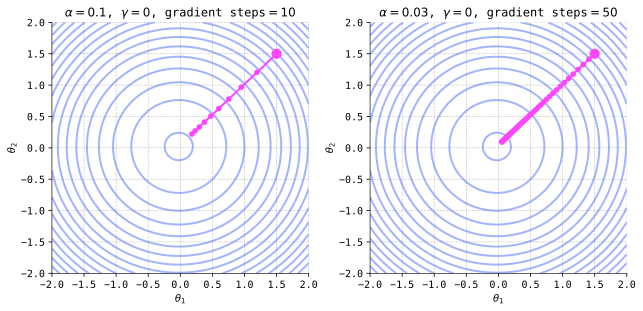

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))

for i in range(2):
    running_parameters = parameters_list[i]['theta']
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    lr = gd_parameters_slice['lr']
    num_epochs = gd_parameters_slice['num_epochs']
    axes[i].contour(grid_1, grid_2, z, levels=torch.arange(start=0, end=10, step=0.5), colors=blue, alpha=0.5)
    axes[i].plot(running_parameters[:, 0], running_parameters[:, 1], color=magenta)
    axes[i].scatter(running_parameters[:, 0], running_parameters[:, 1], s=30, color=magenta, zorder=2)
    axes[i].scatter(running_parameters[0, 0], running_parameters[0, 1], s=100, color=magenta, zorder=2)
    axes[i].set_title(fr'$\alpha={lr}$, $\gamma=0$, gradient steps$={num_epochs}$')
    axes[i].set_xlabel(r'$\theta_1$')
    axes[i].set_ylabel(r'$\theta_2$')

plt.tight_layout()

In both cases, notice that the algorithm is nicely converging toward the minimizer at $\btheta^\star \approx (0,0)$.

One of the drawbacks of the batch algorithm is that it needs the _entire_ dataset in order to take just a single gradient step. This isn't an issue for our small toy dataset of size $m=1{,}024$, but for the large datasets that you may encounter in the real world, this can be a serious hindrance to fast convergence.

One method for dealing with this bottleneck is to use _mini-batches_ of the data to compute gradient steps. To do so, we begin by randomly partitioning the dataset into subsets $B_1,B_2,\ldots,B_\ell$ called _mini-batches_:

```{math}
:label: mini-batch-eqn

B_1 \cup B_2 \cup \cdots \cup B_p = \{\bx^{(1)},\bx^{(2)},\ldots,\bx^{(m)}\}.
```

Supposing that the $j$-th mini-batch $B_j$ has size $\ell_j$, we would then expect from {eq}`batch-eqn` that

```{math}
:label: mini-batch-grad-eqn

\nabla J(\btheta) \approx \frac{1}{\ell_j} \sum_{x^{(i)} \in B_j} \nabla_\btheta g\big(\bx^{(i)}; \btheta\big).
```

Very often, the mini-batch sizes $\ell_1,\ell_2,\ldots,\ell_p$ are chosen to be equal to a common value $\ell$, except (possibly) for one to compensate for the fact that $m$ may not be evenly divisible by $\ell$. For example, if $m=100$ and $\ell=30$, then we would have four mini-batches, three of size $\ell=30$ and the fourth of size $10$.

As you are about to see, the mini-batch version of the GD algorithm loops over the mini-batches {eq}`mini-batch-eqn` and computes gradient steps as in {eq}`mini-batch-grad-eqn`. A single loop through _all_ the mini-batches, covering the _entire_ dataset, is called an _epoch_. As the vanilla version of the GD algorithm takes the number of gradient steps as a parameter, the new version of the algorithm takes the number of epochs as a parameter. This new version is called the _stochastic gradient descent (SGD) algorithm_:

```{prf:algorithm} Stochastic gradient descent with rate decay
:label: sgd-alg

**Input:** A dataset $\bx^{(1)},\ldots,\bx^{(m)}\in \mathbb{R}^n$, a stochastic objective function

$$
J(\btheta) = \frac{1}{m} \sum_{i=1}^m g \big(\bx^{(i)};\btheta \big), \quad \btheta \in \mathbb{R}^n,
$$

where $g:\mathbb{R}^{n+k}\to \mathbb{R}$ is a differentiable function, an initial guess $\btheta_0\in \mathbb{R}^k$ for a minimizer $\btheta^\star$ of $J$, a learning rate $\alpha>0$, a decay rate $\gamma \in [0, 1)$, a mini-batch size $\ell$, and the number $N$ of epochs.

**Output:** An approximation to a minimizer $\btheta^\star$.

* $\btheta := \btheta_0$
* For $t$ from $1$ to $N$, do:
    * Randomly partition the dataset into mini-batches {eq}`mini-batch-eqn` of size $\ell$.
    * For each mini-batch $B_j$, do:
        * $\btheta := \btheta - \frac{\alpha(1-\gamma)^t}{\ell} \sum_{x^{(i)} \in B_j} \nabla_\btheta g\big(\bx^{(i)}; \btheta\big)^T$
* Return $\btheta$.
```

Notice that the dataset is randomly partitioned into mini-batches inside each iteration of the per-epoch `for` loop; and remember that there may be one mini-batch of size $\neq \ell$ if the size of the dataset $m$ is not divisible by $\ell$.

It is possible to select a mini-batch size of $\ell=1$, so that the algorithm computes a gradient step per data point. Some references refer to this algorithm as just _stochastic gradient descent_. In our example {eq}`quadratic-eqn` from above, a step size of $\ell=1$ yields the following plots of objective values versus gradient steps:

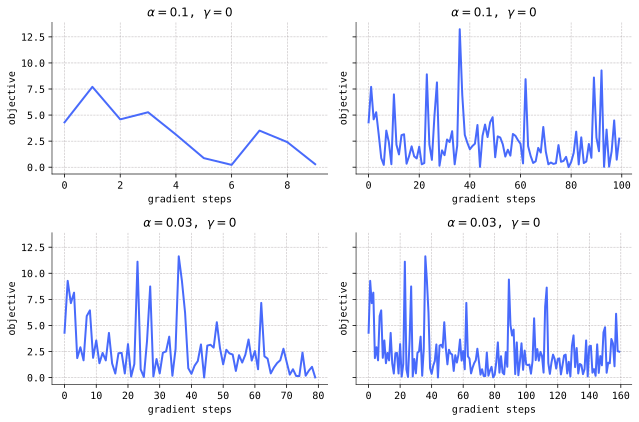

In [14]:
# SGD parameters
num_epochs = 1
batch_size = 1
random_state = 42
gd_parameters = {'lr': [1e-1, 1e-1, 3e-2, 3e-2],
               'max_steps': [10, 100, 80, 160]}
parameters_list = []
objectives_list = []

# run SGD
for i in range(4):
    parameters = {'theta': torch.tensor([1.5, 1.5], requires_grad=True)}
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = SGD(parameters=parameters,
                                                 dataset=dataset,
                                                 J=J,
                                                 tracking='gd_step',
                                                 num_epochs=1,
                                                 batch_size=batch_size,
                                                 random_state=random_state,
                                                 **gd_parameters_slice)
    parameters_list.append(running_parameters)
    objectives_list.append(running_objectives)

# plot the objective function
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i in range(4):
    idx = axes_idx[i]
    objectives = objectives_list[i]
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    lr = gd_parameters_slice['lr']
    axes[idx].plot(range(len(objectives)), objectives)
    axes[idx].set_xlabel('gradient steps')
    axes[idx].set_ylabel('objective')
    axes[idx].set_title(fr'$\alpha={lr}$, $\gamma=0$')

plt.tight_layout()

The plots are very noisy, especially for large numbers of gradient steps. However, a slight downward trend in objective values is detectable, indicating that the algorithm is locating the minimizer. The trace of the algorithm through parameter space is shown in:

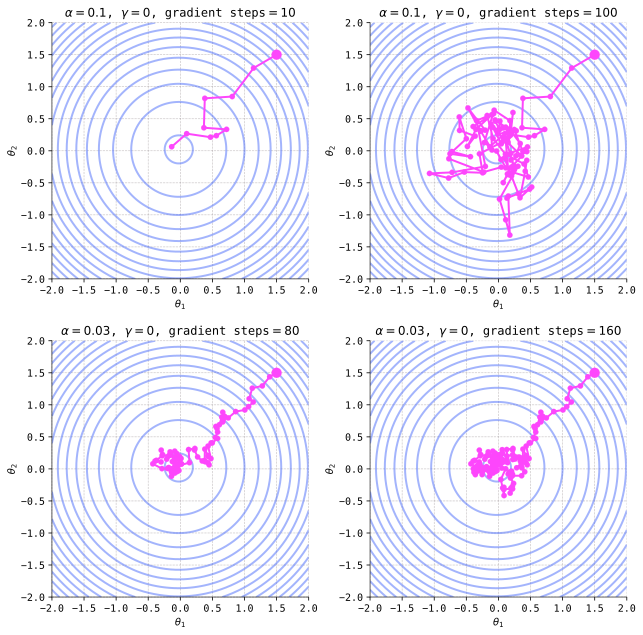

In [15]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i in range(4):
    idx = axes_idx[i]
    running_parameters = parameters_list[i]['theta']
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    lr = gd_parameters_slice['lr']
    max_steps = gd_parameters_slice['max_steps']
    axes[idx].contour(grid_1, grid_2, z, levels=torch.arange(start=0, end=10, step=0.5), colors=blue, alpha=0.5)
    axes[idx].plot(running_parameters[:, 0], running_parameters[:, 1], color=magenta)
    axes[idx].scatter(running_parameters[:, 0], running_parameters[:, 1], s=30, color=magenta, zorder=2)
    axes[idx].scatter(running_parameters[0, 0], running_parameters[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_title(rf'$\alpha={lr}$, $\gamma=0$, gradient steps$={max_steps}$')
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')

plt.tight_layout()

The traces are very noisy, especially in the first row with the large learning rate $\alpha=0.1$. Nevertheless, it is clear that the algorithm has found the neighborhood of the minimizer at $(0,0)$. We might try to tame the noise in these plots by increasing the decay rate, but according to our implementation, that would be equivalent to simply decreasing the learning rate since none of these four runs of the algorithm completes a full epoch. Indeed, notice that the power $t$ in the expression $(1-\gamma)^t$ in the {prf:ref}`statement <sgd-alg>` of the algorithm counts the number of epochs.

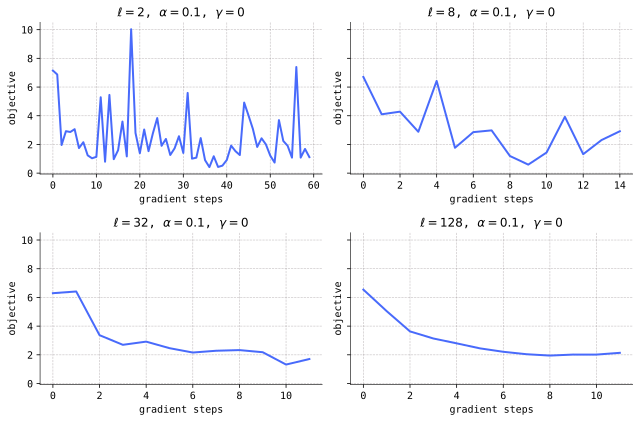

In [16]:
# mini-batch gradient descent parameters
random_state = 42
gd_parameters = {'num_epochs': [1, 1, 1, 2],
               'lr': [1e-1, 1e-1, 1e-1, 1e-1],
               'batch_size': [2, 8, 32, 128],
               'max_steps': [60, 15, 12, 12]}
parameters_list = []
objectives_list = []

# run mini-batch gradient descent
for i in range(4):
    parameters = {'theta': torch.tensor([1.5, 1.5], requires_grad=True)}
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    running_parameters, running_objectives = SGD(parameters=parameters,
                             dataset=dataset,
                             J=J,
                             tracking='gd_step',
                             random_state=random_state,
                             **gd_parameters_slice)
    parameters_list.append(running_parameters)
    objectives_list.append(running_objectives)

# plot the objective function
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i in range(4):
    idx = axes_idx[i]
    objectives = objectives_list[i]
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    batch_size = gd_parameters_slice['batch_size']
    lr = gd_parameters_slice['lr']
    axes[idx].plot(range(len(objectives)), objectives)
    axes[idx].set_xlabel('gradient steps')
    axes[idx].set_ylabel('objective')
    axes[idx].set_title(rf'$\ell={batch_size}$, $\alpha={lr}$, $\gamma=0$')

plt.tight_layout()

Mini-batch GD parameters:

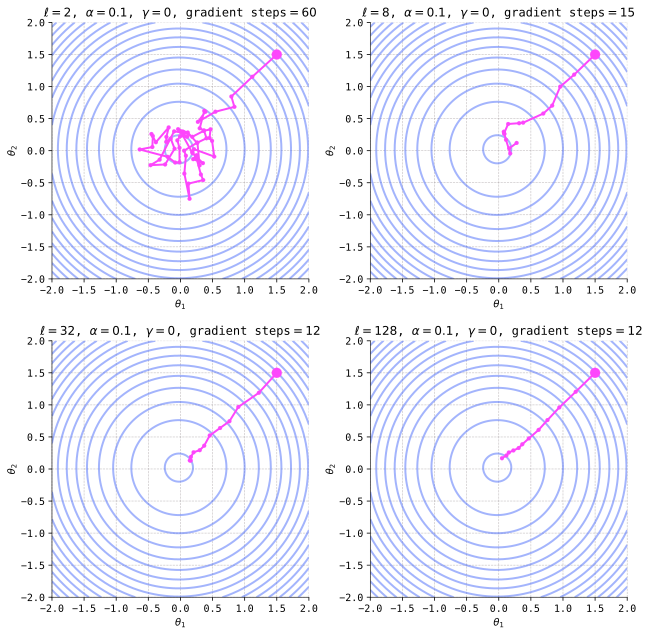

In [17]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i in range(4):
    idx = axes_idx[i]
    running_parameters = parameters_list[i]['theta']
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    batch_size = gd_parameters_slice['batch_size']
    lr = gd_parameters_slice['lr']
    max_steps = gd_parameters_slice['max_steps']
    total_data_points = batch_size * max_steps
    axes[idx].contour(grid_1, grid_2, z, levels=torch.arange(start=0, end=10, step=0.5), colors=blue, alpha=0.5)
    axes[idx].plot(running_parameters[:, 0], running_parameters[:, 1], color=magenta)
    axes[idx].scatter(running_parameters[:, 0], running_parameters[:, 1], color=magenta, zorder=2)
    axes[idx].scatter(running_parameters[0, 0], running_parameters[0, 1], s=100, color=magenta, zorder=2)
    axes[idx].set_title(rf'$\ell={batch_size}$, $\alpha={lr}$, $\gamma=0$, gradient steps$={max_steps}$')
    axes[idx].set_xlabel(r'$\theta_1$')
    axes[idx].set_ylabel(r'$\theta_2$')

plt.tight_layout()